In [1]:
import os
import time

import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

/home/khwankim_dc/anaconda3/envs/diffusers/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

model_id = "runwayml/stable-diffusion-v1-5"
prompt = "portrait photo of a old warrior chief"

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:00,  8.84it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 50/50 [00:15<00:00,  3.14it/s]


Spend time of float32: 16.83394742012024


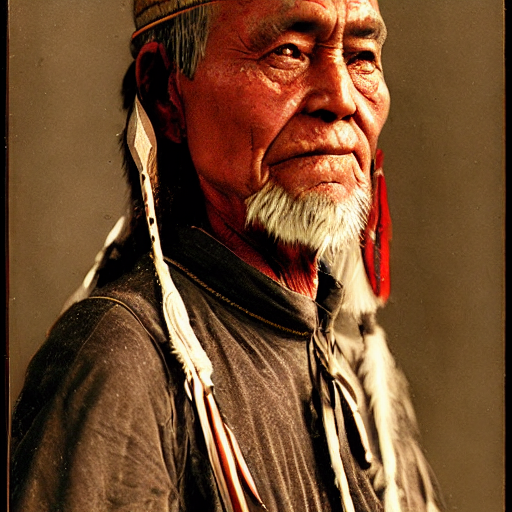

In [3]:
# Float32
pipeline = DiffusionPipeline.from_pretrained(model_id, use_safetensors=True)
pipeline = pipeline.to("cuda")

generator = torch.Generator("cuda").manual_seed(1)

start = time.time()
image = pipeline(prompt, generator=generator).images[0]
print(f"Spend time of float32: {time.time() - start}")
image

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:01,  3.01it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 50/50 [01:26<00:00,  1.73s/it]


Spend time of float16: 87.17976927757263


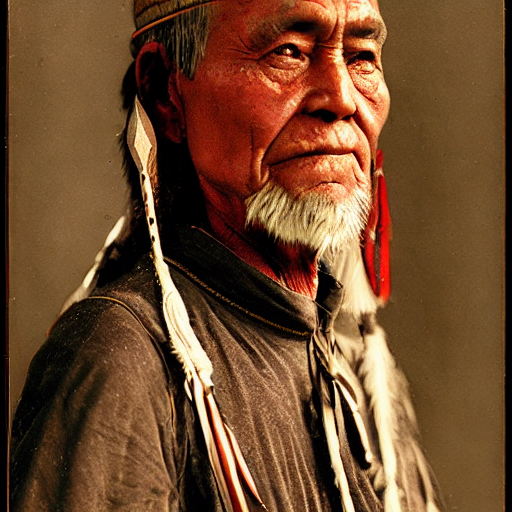

In [4]:
# Float16
pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
pipeline = pipeline.to("cuda")

generator = torch.Generator("cuda").manual_seed(1)

start = time.time()
image = pipeline(prompt, generator=generator).images[0]
print(f"Spend time of float16: {time.time() - start}")
image

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:01,  3.65it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 20/20 [00:06<00:00,  3.30it/s]


Spend time of float32 with DPMSolverMultistepScheduler: 6.423298358917236


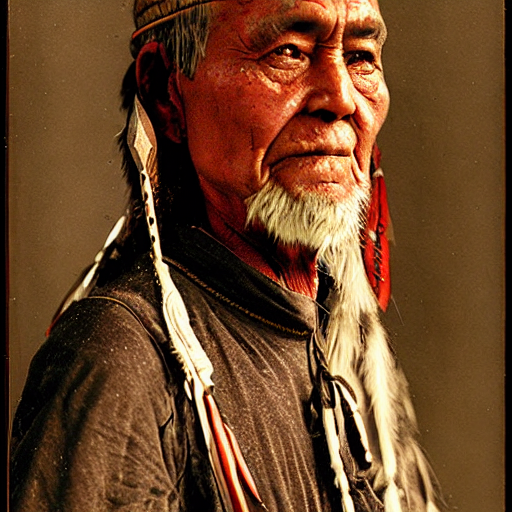

In [5]:
# DPMSolverMultistepScheduler
pipeline = DiffusionPipeline.from_pretrained(model_id, use_safetensors=True)
pipeline = pipeline.to("cuda")
pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator("cuda").manual_seed(1)

start = time.time()
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
print(f"Spend time of float32 with DPMSolverMultistepScheduler: {time.time() - start}")
image

Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:01,  2.65it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
100%|██████████| 20/20 [00:33<00:00,  1.70s/it]


Spend time of float16 with DPMSolverMultistepScheduler: 34.50755524635315


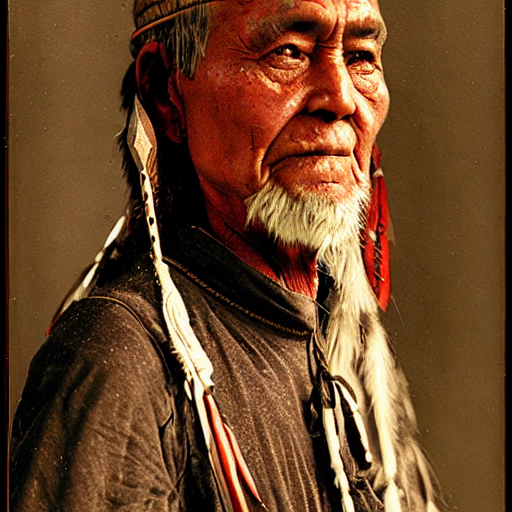

In [6]:
# float16 + DPMSolverMultistepScheduler
pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
pipeline = pipeline.to("cuda")
pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)

generator = torch.Generator("cuda").manual_seed(1)

start = time.time()
image = pipeline(prompt, generator=generator, num_inference_steps=20).images[0]
print(f"Spend time of float16 with DPMSolverMultistepScheduler: {time.time() - start}")
image